# Teoría de Grafos
Adrián Fernández Cano

##Librerías

In [45]:
import IPython
%matplotlib inline
#sci py libraries
import numpy as np
import scipy as sp
import scipy.linalg as la
#abstract graphs libraries
import networkx as nx
import random
#ploting and drawing libraries:
from nxpd import draw
import scipy.integrate as sint
import matplotlib.pyplot as plt

<br/>
##Definición de grafo
Un grafo <b>G = (V, E)</b> es una par ordenado donde <b>V</b> es un conjunto normalmente finito de vértices(nodos) unidos
por enlaces (aristas). <b>E</b> es el conjunto de pares ordenados (aristas) que relacionan a estos vértices.
Se llama <b>orden</b> del grafo G a su número de vértices, |V|.

##Grafo simple
Un grafo es <b>simple</b> si como mucho entre dos vértices cualesquiera solo existe una arista que los une.
Un grafo que no es simple se denomina <b>multigrafo</b>.

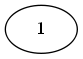

In [46]:
"""Crear grafo vacío (sin nodos ni aristas)"""
grafo = nx.Graph()
grafo.add_node(1)
draw(grafo, show='ipynb')

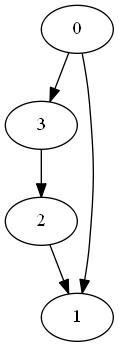

In [47]:
G = nx.DiGraph()
G.add_edges_from([(0,3), (3,2), (0,1), (2,1)])
draw(G, show='ipynb')

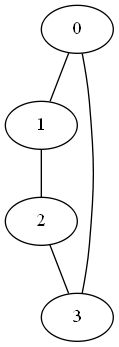

In [48]:

G = np.array([[0,0,0,1],
              [1,0,0,0],
              [0,1,0,1],
              [0,0,1,0]])

G = nx.from_numpy_matrix(G)
draw(G, show='ipynb')

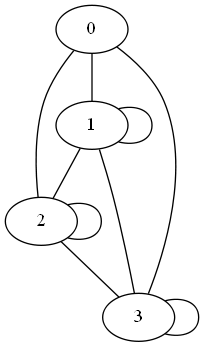

In [49]:
Adj1 = np.array([[0, 3, 1, 2], 
                [3, 1, 1, 1],
                [1, 1, 2, 2],
                [2, 1, 2, 1]
               ])

G1 = nx.from_numpy_matrix(Adj1)

draw(G1, show='ipynb')

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

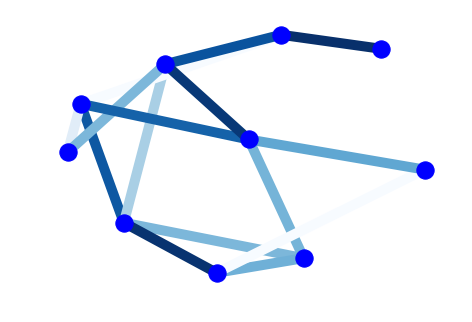

In [50]:

G = nx.gnp_random_graph(10,0.3)
for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues)

